<a href="https://colab.research.google.com/github/v5v5/trading/blob/main/trade_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

URL to download quotes EURUSD

https://query1.finance.yahoo.com/v7/finance/download/EURUSD=X?period1=1262304000&period2=1619654400&interval=1d&events=history&includeAdjustedClose=true

In [1107]:
import pandas as pd
from urllib.request import Request, urlopen
from io import StringIO
import datetime
from dateutil.relativedelta import relativedelta
import time
import random
import math
import matplotlib.pyplot as plt

In [1108]:
# dt_from = datetime.date(2000,1,1)
# dt_from = datetime.date(2019,1,1)
dt_from = datetime.date.today() + relativedelta(years=-1)
ut_from = str(int(time.mktime(dt_from.timetuple())))
ut_from

'1588464000'

In [1109]:
dt_to = datetime.date.today()
ut_to = str(int(time.mktime(dt_to.timetuple())))
ut_to

'1620000000'

In [1110]:
# url='https://query1.finance.yahoo.com/v7/finance/download/EURUSD=X?period1=1262304000&period2=1619654400&interval=1d&events=history&includeAdjustedClose=true'
url='https://query1.finance.yahoo.com/v7/finance/download/EURUSD=X?period1=' + ut_from + '&period2=' + ut_to + '&interval=1d&events=history&includeAdjustedClose=true'

In [1111]:
headers={'User-Agent': 'Mozilla/5.0'}

In [1112]:
req = Request(url, headers=headers)

In [1113]:
page = urlopen(req)
# page = urlopen(url)

In [1114]:
page = urlopen(url)

In [1115]:
content = page.read()

In [1116]:
text = content.decode('UTF-8')

In [1117]:
print(text[:300])

Date,Open,High,Low,Close,Adj Close,Volume
2020-05-04,1.095746,1.095782,1.090132,1.095963,1.095963,0
2020-05-05,1.090453,1.092132,1.082696,1.090429,1.090429,0
2020-05-06,1.084011,1.084481,1.078423,1.083858,1.083858,0
2020-05-07,1.080054,1.081572,1.076751,1.079855,1.079855,0
2020-05-08,1.083694,1.0873


In [1118]:
data = StringIO(text)

In [1119]:
df1 = pd.read_csv(data, sep=',', header='infer')

In [1120]:
df1.tail(7)

,Date,Open,High,Low,Close,Adj Close,Volume
254,2021-04-23,1.201793,1.207799,1.201389,1.201475,1.201475,0
255,2021-04-26,1.208956,1.211827,1.206374,1.208985,1.208985,0
256,2021-04-27,1.207921,1.209190,1.205793,1.208167,1.208167,0
257,2021-04-28,1.208854,1.210214,1.205764,1.209031,1.209031,0
258,2021-04-29,1.213578,1.215214,1.210419,1.213592,1.213592,0
259,2021-04-30,1.212489,1.212856,1.202472,1.212709,1.212709,0
260,2021-05-03,1.202501,1.204094,1.201779,1.202501,1.202501,0


In [1121]:
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

In [1122]:
df1['DayOfWeek'] = df1['Date'].dt.dayofweek

In [1123]:
df1.tail(7)

,Date,Open,High,Low,Close,Adj Close,Volume,DayOfWeek
254,2021-04-23,1.201793,1.207799,1.201389,1.201475,1.201475,0,4
255,2021-04-26,1.208956,1.211827,1.206374,1.208985,1.208985,0,0
256,2021-04-27,1.207921,1.209190,1.205793,1.208167,1.208167,0,1
257,2021-04-28,1.208854,1.210214,1.205764,1.209031,1.209031,0,2
258,2021-04-29,1.213578,1.215214,1.210419,1.213592,1.213592,0,3
259,2021-04-30,1.212489,1.212856,1.202472,1.212709,1.212709,0,4
260,2021-05-03,1.202501,1.204094,1.201779,1.202501,1.202501,0,0


In [1124]:
df2 = df1.drop(['High','Low', 'Adj Close', 'Volume'], axis=1)

In [1125]:
df2.tail(7)

,Date,Open,Close,DayOfWeek
254,2021-04-23,1.201793,1.201475,4
255,2021-04-26,1.208956,1.208985,0
256,2021-04-27,1.207921,1.208167,1
257,2021-04-28,1.208854,1.209031,2
258,2021-04-29,1.213578,1.213592,3
259,2021-04-30,1.212489,1.212709,4
260,2021-05-03,1.202501,1.202501,0


In [1126]:
df2['Close-1'] = df2['Close'].shift(1)
df2['Open-1'] = df2['Open'].shift(1)

In [1127]:
df2.tail(7)

,Date,Open,Close,DayOfWeek,Close-1,Open-1
254,2021-04-23,1.201793,1.201475,4,1.203775,1.203818
255,2021-04-26,1.208956,1.208985,0,1.201475,1.201793
256,2021-04-27,1.207921,1.208167,1,1.208985,1.208956
257,2021-04-28,1.208854,1.209031,2,1.208167,1.207921
258,2021-04-29,1.213578,1.213592,3,1.209031,1.208854
259,2021-04-30,1.212489,1.212709,4,1.213592,1.213578
260,2021-05-03,1.202501,1.202501,0,1.212709,1.212489


In [1128]:
df2['%Close'] = (df2['Close'] - df2['Close-1']) / df2['Close-1'] * 100
df2['%Open'] = (df2['Open'] - df2['Open-1']) / df2['Open-1'] * 100

In [1129]:
df2 = df2.drop(['Close','Close-1', '%Close'], axis=1)

In [1130]:
df2.head(7)

,Date,Open,DayOfWeek,Open-1,%Open
0,2020-05-04,1.095746,0,NaN,NaN
1,2020-05-05,1.090453,1,1.095746,-0.483050
2,2020-05-06,1.084011,2,1.090453,-0.590764
3,2020-05-07,1.080054,3,1.084011,-0.365033
4,2020-05-08,1.083694,4,1.080054,0.337020
5,2020-05-11,1.084011,0,1.083694,0.029252
6,2020-05-12,1.080917,1,1.084011,-0.285421


In [1131]:
# take decision to buy or sell if price = 1.167072 then buy = -1.167072 or sell = 1.167072
def take_decision(index):
  row = df2.loc[index]
  return random.choice([-row['Open'], +row['Open']])

In [1132]:
def is_guessed(index):
  if (index < 1):
    return True
  return (math.copysign(1, df2.loc[index]['%Open']) != math.copysign(1, df2.loc[index - 1]['decision']))

In [1133]:
def make_deal(index):
  k = df2.loc[index, 'k'] 
  decision = df2.loc[index, 'decision'] 
  return decision * (2 ** k)

In [1134]:
def discover_trend(index):
  if (index < 1):
    df2.loc[index, 'trend'] = 0
    return
  open_curr = df2.loc[index, '%Open']
  open_prev = df2.loc[index-1, '%Open']
  if (math.copysign(1, open_prev) == math.copysign(1, open_curr)):
    df2.loc[index, 'trend'] = df2.loc[index-1, 'trend'] + 1
  else:
    df2.loc[index, 'trend'] = 0

In [1135]:
# this is a main algorithm for trading
def trade():
  for index, row in df2.iterrows():
    # take decision
    df2.loc[index, 'decision'] = take_decision(index)
    if (is_guessed(index)):
      k = 0
    else:
      k += 1
    df2.loc[index, 'k'] = k
    # make deal
    deal = make_deal(index)
    df2.loc[index, 'deal'] = deal
    if (index == 0):
      df2.loc[index, 'result after close'] = 0      
      df2.loc[index, 'result'] = 0
    else:
      # close prvious deal
      df2.loc[index, 'result after close'] = df2.loc[index - 1, 'result after close'] + df2.loc[index - 1, 'deal'] - \
        (2 ** df2.loc[index - 1, 'k']) * df2.loc[index, 'Open']
      # open new deal
      df2.loc[index, 'result'] = df2.loc[index, 'result after close'] + deal
    # определяем тренд
    discover_trend(index)

In [1136]:
trade()
df2.head(15)

,Date,Open,DayOfWeek,Open-1,%Open,decision,k,deal,result after close,result,trend
0,2020-05-04,1.095746,0,NaN,NaN,-1.095746,0.0,-1.095746,0.000000,0.000000,0.0
1,2020-05-05,1.090453,1,1.095746,-0.483050,-1.090453,1.0,-2.180906,-2.186199,-4.367105,0.0
2,2020-05-06,1.084011,2,1.090453,-0.590764,1.084011,2.0,4.336044,-6.535127,-2.199083,1.0
3,2020-05-07,1.080054,3,1.084011,-0.365033,-1.080054,0.0,-1.080054,-6.519299,-7.599353,2.0
4,2020-05-08,1.083694,4,1.080054,0.337020,1.083694,0.0,1.083694,-8.683047,-7.599353,0.0
5,2020-05-11,1.084011,0,1.083694,0.029252,1.084011,1.0,2.168022,-8.683364,-6.515342,1.0
6,2020-05-12,1.080917,1,1.084011,-0.285421,1.080917,0.0,1.080917,-8.677176,-7.596259,0.0
7,2020-05-13,1.084634,2,1.080917,0.343875,1.084634,1.0,2.169268,-8.680893,-6.511625,0.0
8,2020-05-14,1.082193,3,1.084634,-0.225053,1.082193,0.0,1.082193,-8.676011,-7.593818,0.0
9,2020-05-15,1.080625,4,1.082193,-0.144891,1.080625,0.0,1.080625,-8.674443,-7.593818,1.0


In [1137]:
df2.describe()

,Open,DayOfWeek,Open-1,%Open,decision,k,deal,result after close,result,trend
count,261.000000,261.000000,260.000000,260.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,1.176550,1.992337,1.176450,0.036557,0.119674,0.973180,0.036823,-831.446759,-831.405738,0.934866
std,0.037332,1.419622,0.037369,0.399199,1.173290,1.390645,22.540160,438.627374,439.496465,1.300729
min,1.080054,0.000000,1.080054,-1.026176,-1.229906,0.000000,-296.107776,-1498.603285,-1496.198283,0.000000
25%,1.167365,1.000000,1.167072,-0.246063,-1.184273,0.000000,-1.213578,-1121.262711,-1121.268226,0.000000
50%,1.184180,2.000000,1.184178,0.029910,1.118568,0.000000,1.167365,-960.149904,-958.975126,0.000000
75%,1.204935,3.000000,1.205015,0.329382,1.183656,1.000000,2.328560,-799.387898,-798.211843,1.000000
max,1.233776,4.000000,1.233776,1.106827,1.233776,8.000000,147.649152,0.000000,0.000000,7.000000


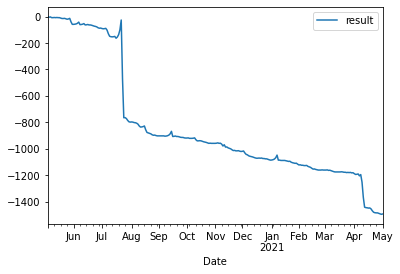

In [1138]:
df2.plot('Date', 'result')